In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("Hyd School.csv")

In [4]:
df.head(5)

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,The Oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,Absolutely thrilled with Oakridge School's sum...
2,1 photo,5 stars,a month ago,NaN,Very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,I am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,My son is attending summer camp this year at O...


In [5]:
#imp step we are converting the dtype of user_text to string

df['user_text'] = df['user_text'].astype(str)

In [ ]:
general steps in text preprocessing

1. Lowercase
2.Removing HTML tags(regex concept)
3. removing URLs
4. removing punctuations
5.chat word tretement
6. removing stop words
7. handling emojis
8. tokenisation
9. stemming or lemmatization

In [6]:
#step 1 

# converting to lowercase to avoid confusion between A(capital) and a(small) to our model


df['user_text'] = df['user_text'].str.lower()
df.head(5)

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,the oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge school's sum...
2,1 photo,5 stars,a month ago,NaN,very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,i am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,my son is attending summer camp this year at o...


In [7]:
#step 2 

# Removing HTML tags(regex concept)

import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [8]:
df['user_text'] = df['user_text'].apply(remove_html_tags)

In [9]:
df.head(5)

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,the oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge school's sum...
2,1 photo,5 stars,a month ago,NaN,very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,i am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,my son is attending summer camp this year at o...


In [10]:
#step 3 

# removing URLs

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [11]:
remove_url(df['user_text'][3])

"i am delighted to express my utmost satisfaction with oakridge international school, especially the eyp2c class where my son, master sriram peesapati, is thriving under the excellent guidance of ms. nazia. the meticulous care taken by ms. nazia in teaching, coupled with the diverse and engaging activities, reflects the school's commitment to holistic learning. the school's infrastructure is commendable, providing a conducive environment for my child's overall development. as parents, we are genuinely pleased with the positive impact oakridge is having on our son's education and firmly believe it lays a strong foundation for his future success."

In [12]:
df['user_text'] = df['user_text'].apply(remove_url)

In [13]:
df.head(5)

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,the oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge school's sum...
2,1 photo,5 stars,a month ago,NaN,very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,i am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,my son is attending summer camp this year at o...


In [14]:
#step 4

# removing punctuations

import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
exclude = string.punctuation

In [16]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text
        

In [17]:
print(remove_punc(df['user_text'][3]))

i am delighted to express my utmost satisfaction with oakridge international school especially the eyp2c class where my son master sriram peesapati is thriving under the excellent guidance of ms nazia the meticulous care taken by ms nazia in teaching coupled with the diverse and engaging activities reflects the schools commitment to holistic learning the schools infrastructure is commendable providing a conducive environment for my childs overall development as parents we are genuinely pleased with the positive impact oakridge is having on our sons education and firmly believe it lays a strong foundation for his future success


In [18]:
df['user_text'] = df['user_text'].apply(remove_punc)

In [19]:
df.head(5)

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,the oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...
2,1 photo,5 stars,a month ago,NaN,very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,i am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,my son is attending summer camp this year at o...


In [20]:
#step 5 

# removing stopwords

from nltk.corpus import stopwords

In [21]:

import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [23]:
remove_stopwords(df['user_text'][3])

'  delighted  express  utmost satisfaction  oakridge international school especially  eyp2c class   son master sriram peesapati  thriving   excellent guidance  ms nazia  meticulous care taken  ms nazia  teaching coupled   diverse  engaging activities reflects  schools commitment  holistic learning  schools infrastructure  commendable providing  conducive environment   childs overall development  parents   genuinely pleased   positive impact oakridge     sons education  firmly believe  lays  strong foundation   future success'

In [24]:
df['user_text'].apply(remove_stopwords)

0       oakridge summer camp   hit   child early morn...
1      absolutely thrilled  oakridge schools summer c...
2       well organized  oakridge international school...
3        delighted  express  utmost satisfaction  oak...
4       son  attending summer camp  year  oakridge ca...
                             ...                        
482                                                  nan
483                                                  nan
484                                                  nan
485                                                  nan
486                                                  nan
Name: user_text, Length: 487, dtype: object

In [25]:
#step 6 

# removing emojis

import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [26]:
df['user_text'].apply(remove_emojis)

0      the oakridge summer camp was a hit with our ch...
1      absolutely thrilled with oakridge schools summ...
2      very well organized  at oakridge international...
3      i am delighted to express my utmost satisfacti...
4      my son is attending summer camp this year at o...
                             ...                        
482                                                  nan
483                                                  nan
484                                                  nan
485                                                  nan
486                                                  nan
Name: user_text, Length: 487, dtype: object

In [27]:
# step 7

# removing special characters, numbers and punctuations

df['user_text'] = df['user_text'].str.replace("[^a-zA-Z#]", " ")
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,the oakridge summer camp was a hit with our ch...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...
2,1 photo,5 stars,a month ago,NaN,very well organized at oakridge international...
3,1 photo,5 stars,6 months ago,2.0,i am delighted to express my utmost satisfacti...
4,NaN,5 stars,a month ago,NaN,my son is attending summer camp this year at o...


In [28]:
# step 8 

#removing short words like "is,the,for,as,i and many more" which are not going to contribute in our analysis

df['user_text'] = df['user_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...


In [29]:
*****



Tokenization=breaking down a piece of text into smaller units called tokens.

why tokenization?
our model should treat new and new delhi as different



*****

SyntaxError: invalid syntax (103212931.py, line 1)

In [ ]:
# NLTK , spaCy , Gensim  are  Common Tokenization Libraries in Python

In [30]:
#step 1

#Tokenization using NLTK


from nltk.tokenize import word_tokenize,sent_tokenize

In [31]:
df['tokenized_text'] = df['user_text'].apply(word_tokenize)

In [32]:
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text,tokenized_text
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...,"[oakridge, summer, camp, with, child, early, m..."
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...,"[absolutely, thrilled, with, oakridge, schools..."
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...,"[very, well, organized, oakridge, internationa..."
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...,"[delighted, express, utmost, satisfaction, wit..."
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...,"[attending, summer, camp, this, year, oakridge..."


In [33]:
!pip install spacy


In [34]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 798.9 kB/s eta 0:00:16
     - -------------------------------------- 0.3/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.6/12.8 MB 2.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 3.0 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 4.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.5 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.6 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 4.9 MB/s eta

In [35]:
# step 2

#Tokenization using spaCy(preferred)

import spacy
nlp = spacy.load('en_core_web_sm')

# Define the tokenization function
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization to the 'user_text' column
df['tokenized_text'] = df['user_text'].apply(spacy_tokenize)


In [36]:
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text,tokenized_text
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...,"[oakridge, summer, camp, with, child, early, m..."
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...,"[absolutely, thrilled, with, oakridge, schools..."
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...,"[very, well, organized, oakridge, internationa..."
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...,"[delighted, express, utmost, satisfaction, wit..."
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...,"[attending, summer, camp, this, year, oakridge..."


In [37]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

df['stem'] = df['user_text'].apply(spacy_tokenize)

In [38]:
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text,tokenized_text,stem
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...,"[oakridge, summer, camp, with, child, early, m...","[oakridge, summer, camp, with, child, early, m..."
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...,"[absolutely, thrilled, with, oakridge, schools...","[absolutely, thrilled, with, oakridge, schools..."
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...,"[very, well, organized, oakridge, internationa...","[very, well, organized, oakridge, internationa..."
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...,"[delighted, express, utmost, satisfaction, wit...","[delighted, express, utmost, satisfaction, wit..."
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...,"[attending, summer, camp, this, year, oakridge...","[attending, summer, camp, this, year, oakridge..."


In [39]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    punctuations = "?:!.,;"
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in punctuations]
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['user_text'].apply(lemmatize_text)


In [41]:
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text,tokenized_text,stem,lemmatized_text
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...,"[oakridge, summer, camp, with, child, early, m...","[oakridge, summer, camp, with, child, early, m...",oakridge summer camp with child early mornings...
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...,"[absolutely, thrilled, with, oakridge, schools...","[absolutely, thrilled, with, oakridge, schools...",absolutely thrill with oakridge school summer ...
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...,"[very, well, organized, oakridge, internationa...","[very, well, organized, oakridge, internationa...",very well organize oakridge international scho...
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...,"[delighted, express, utmost, satisfaction, wit...","[delighted, express, utmost, satisfaction, wit...",delight express utmost satisfaction with oakri...
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...,"[attending, summer, camp, this, year, oakridge...","[attending, summer, camp, this, year, oakridge...",attend summer camp this year oakridge campus b...


In [42]:
df['lemmatized_text'][3]

'delight express utmost satisfaction with oakridge international school especially eyp2c class where master sriram peesapati thrive under excellent guidance nazia meticulous care take nazia teach couple with diverse engage activities reflect school commitment holistic learn school infrastructure commendable provide conducive environment childs overall development parent genuinely please with positive impact oakridge have sons education firmly believe lay strong foundation future success'

In [ ]:
# till here we have lemmatized text now we will go for n-grams, LDA, topic modelling and other stuff..........

In [43]:
!pip install gensim


In [44]:
import pandas as pd
from gensim.models import Phrases
from gensim.models.phrases import Phraser


In [45]:
# Build the bigram and trigram models
bigram = Phrases(df['tokenized_text'], min_count=1, threshold=10)  # Adjust min_count and threshold as needed
trigram = Phrases(bigram[df['tokenized_text']], threshold=2)

# Convert Phrases models to Phrasers for faster processing
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Applying the bigram and trigram models to the tokenized text
df['bigrams'] = df['tokenized_text'].apply(lambda x: bigram_mod[x])
df['trigrams'] = df['bigrams'].apply(lambda x: trigram_mod[x])

# Display the results
print("Original Tokenized Text:")
print(df['tokenized_text'][0])
print("\nBigrams:")
print(df['bigrams'][0])
print("\nTrigrams:")
print(df['trigrams'][0])


Original Tokenized Text:
['oakridge', 'summer', 'camp', 'with', 'child', 'early', 'mornings', 'were', 'problem', 'thanks', 'exciting', 'activities', 'handson', 'learning', 'from', 'swimming', 'archery', 'dance', 'stem', 'camp', 'kept', 'engaged', 'energized', 'long', 'did', 'nt', 'stop', 'pickup', 'loved', 'recounting', 'adventures', 'with', 'friends', 'teachers', 'keeping', 'excitement', 'alive', 'were', 'bummed', 'program', 'ending', 'soon', 'flew', 'thank', 'entire', 'team', 'creating', 'such', 'wellrounded', 'engaging', 'program', 'planning', 'transportation', 'food', 'activities', 'were', 'fantastic', 'especially', 'appreciate', 'vinaya', 'mams', 'patience', 'care', 'children', 'throughout', 'camp', 'hope', 'more', 'programs', 'like', 'this', 'future']

Bigrams:
['oakridge', 'summer_camp', 'with', 'child', 'early', 'mornings', 'were', 'problem', 'thanks', 'exciting_activities', 'handson', 'learning', 'from', 'swimming', 'archery', 'dance', 'stem', 'camp', 'kept_engaged', 'energize

In [46]:
df.head()

,user_review_no,rating,time_ago,comment_likes,user_text,tokenized_text,stem,lemmatized_text,bigrams,trigrams
0,73 reviews,5 stars,a month ago,NaN,oakridge summer camp with child early mornings...,"[oakridge, summer, camp, with, child, early, m...","[oakridge, summer, camp, with, child, early, m...",oakridge summer camp with child early mornings...,"[oakridge, summer_camp, with, child, early, mo...","[oakridge, summer_camp, with, child, early, mo..."
1,1 photo,5 stars,a month ago,NaN,absolutely thrilled with oakridge schools summ...,"[absolutely, thrilled, with, oakridge, schools...","[absolutely, thrilled, with, oakridge, schools...",absolutely thrill with oakridge school summer ...,"[absolutely, thrilled_with, oakridge, schools,...","[absolutely, thrilled_with, oakridge, schools,..."
2,1 photo,5 stars,a month ago,NaN,very well organized oakridge international sch...,"[very, well, organized, oakridge, internationa...","[very, well, organized, oakridge, internationa...",very well organize oakridge international scho...,"[very_well, organized, oakridge_international,...","[very_well, organized, oakridge_international_..."
3,1 photo,5 stars,6 months ago,2.0,delighted express utmost satisfaction with oak...,"[delighted, express, utmost, satisfaction, wit...","[delighted, express, utmost, satisfaction, wit...",delight express utmost satisfaction with oakri...,"[delighted, express, utmost, satisfaction_with...","[delighted, express, utmost, satisfaction_with..."
4,NaN,5 stars,a month ago,NaN,attending summer camp this year oakridge campu...,"[attending, summer, camp, this, year, oakridge...","[attending, summer, camp, this, year, oakridge...",attend summer camp this year oakridge campus b...,"[attending_summer, camp, this_year, oakridge, ...","[attending_summer, camp, this_year, oakridge, ..."


In [47]:
!pip install wordcloud matplotlib


In [48]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [49]:
# Combine all bigrams and trigrams into a single list
all_phrases = []
for bigrams, trigrams in zip(df['bigrams'], df['trigrams']):
    all_phrases.extend(bigrams)
    all_phrases.extend(trigrams)

# Convert the list of phrases to a single string
phrases_string = ' '.join(all_phrases)


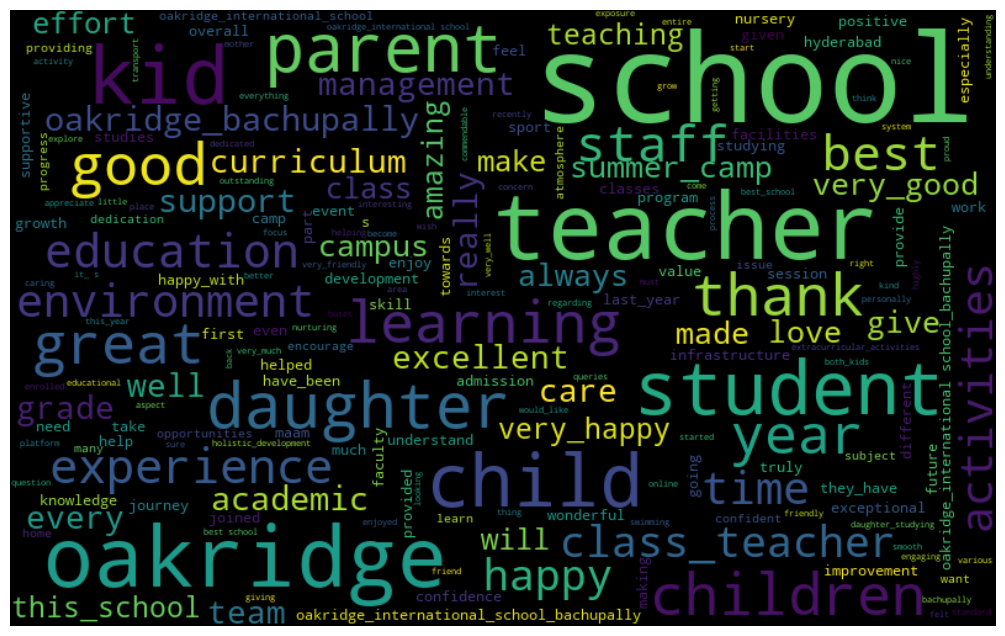

In [50]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(phrases_string)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#let's go for topic modelling

# !pip install gensim pyLDAvis
!pip install --upgrade pyLDAvis


In [51]:
import sys
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [52]:
tokenize_column_list= df['tokenized_text'].tolist()
id2word = corpora.Dictionary(tokenize_column_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tokenize_column_list]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

C:\Users\kumar\anaconda3\Lib\site-packages\gensim\models\ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


[(0,
  '0.005*"students" + 0.004*"that" + 0.003*"exceptional" + 0.003*"knowledge" + '
  '0.003*"learning" + 0.003*"recently" + 0.003*"guidance" + 0.003*"truly" + '
  '0.002*"board" + 0.002*"global"'),
 (1,
  '0.039*"school" + 0.020*"with" + 0.019*"oakridge" + 0.017*"very" + '
  '0.015*"kids" + 0.013*"teachers" + 0.013*"have" + 0.010*"good" + '
  '0.009*"their" + 0.009*"they"'),
 (2,
  '0.015*"that" + 0.009*"thank" + 0.008*"management" + 0.007*"campus" + '
  '0.007*"team" + 0.006*"really" + 0.005*"made" + 0.005*"feel" + 0.005*"’s" + '
  '0.004*"such"'),
 (3,
  '0.008*"they" + 0.008*"about" + 0.008*"more" + 0.007*"admission" + '
  '0.007*"were" + 0.006*"school" + 0.006*"after" + 0.006*"this" + '
  '0.005*"there" + 0.005*"nt"')]


In [55]:
data = df.values.tolist()

In [56]:
import pandas as pd

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]])], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents.rename('Text')], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokenize_column_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(30)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.5527,"that, thank, management, campus, team, really, made, feel, ’s, such","[oakridge, summer, camp, with, child, early, mornings, were, problem, thanks, exciting, activiti..."
1,1,1,0.4900,"school, with, oakridge, very, kids, teachers, have, good, their, they","[absolutely, thrilled, with, oakridge, schools, summer, camp, bachupally, having, blast, eagerly..."
2,2,1,0.7140,"school, with, oakridge, very, kids, teachers, have, good, their, they","[very, well, organized, oakridge, international, school, child, liked, archery, tapes, tunes, sw..."
3,3,1,0.8777,"school, with, oakridge, very, kids, teachers, have, good, their, they","[delighted, express, utmost, satisfaction, with, oakridge, international, school, especially, ey..."
4,4,2,0.7581,"that, thank, management, campus, team, really, made, feel, ’s, such","[attending, summer, camp, this, year, oakridge, campus, bachupally, thoroughly, enjoying, summer..."
5,5,2,0.8028,"that, thank, management, campus, team, really, made, feel, ’s, such","[enrolled, summer, camp, this, year, each, very, interesting, exciting, happy, that, swim, which..."
6,6,1,0.7279,"school, with, oakridge, very, kids, teachers, have, good, their, they","[have, enrolled, kids, aged, summer, camp, this, year, 2024, very, happy, with, decision, oakrid..."
7,7,1,0.7687,"school, with, oakridge, very, kids, teachers, have, good, their, they","[first, experience, with, oakridge, amazing, have, enrolled, their, stupendous, summer, camp, pr..."
8,8,1,0.8694,"school, with, oakridge, very, kids, teachers, have, good, their, they","[studying, early, year, programme, experience, with, oakridge, been, nothing, short, exceptional..."
9,9,1,0.9809,"school, with, oakridge, very, kids, teachers, have, good, their, they","[very, happy, express, satisfaction, with, oakridge, international, schoolthis, right, place, ki..."


In [57]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8123,"students, that, exceptional, knowledge, learning, recently, guidance, truly, board, global","[oigv, bjvnlh, koojnkp]"
1,1,0.9854,"school, with, oakridge, very, kids, teachers, have, good, their, they","[oakridge, international, school, served, great, place, provide, holistic, education, children, ..."
2,2,0.8028,"that, thank, management, campus, team, really, made, feel, ’s, such","[enrolled, summer, camp, this, year, each, very, interesting, exciting, happy, that, swim, which..."
3,3,0.7671,"they, about, more, admission, were, school, after, this, there, nt","[trying, reach, since, week, answered, call, atleast, call, back, do, nt, looking, admission]"


In [58]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8123,"students, that, exceptional, knowledge, learning, recently, guidance, truly, board, global","[oigv, bjvnlh, koojnkp]"
1,1,0.9854,"school, with, oakridge, very, kids, teachers, have, good, their, they","[oakridge, international, school, served, great, place, provide, holistic, education, children, ..."
2,2,0.8028,"that, thank, management, campus, team, really, made, feel, ’s, such","[enrolled, summer, camp, this, year, each, very, interesting, exciting, happy, that, swim, which..."
3,3,0.7671,"they, about, more, admission, were, school, after, this, there, nt","[trying, reach, since, week, answered, call, atleast, call, back, do, nt, looking, admission]"


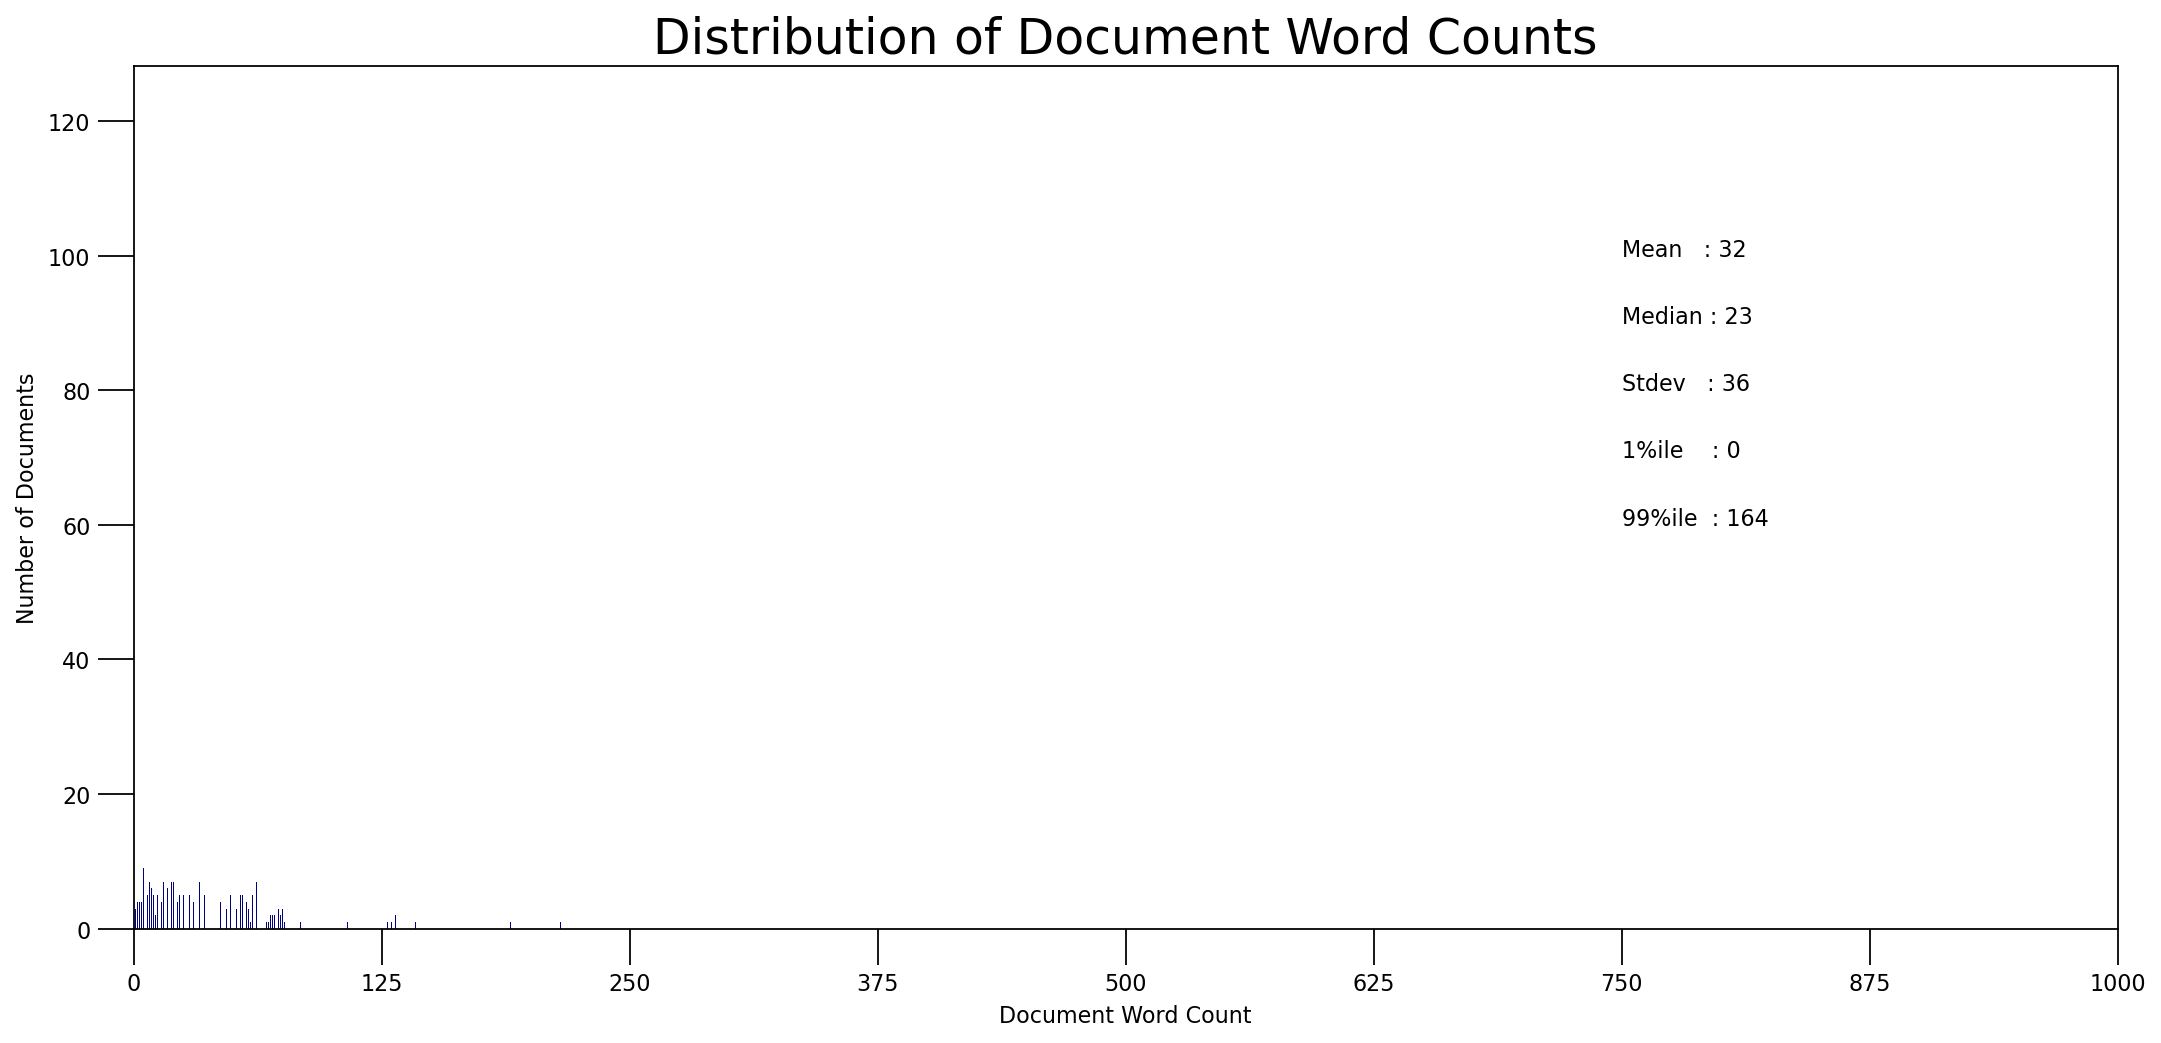

In [59]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

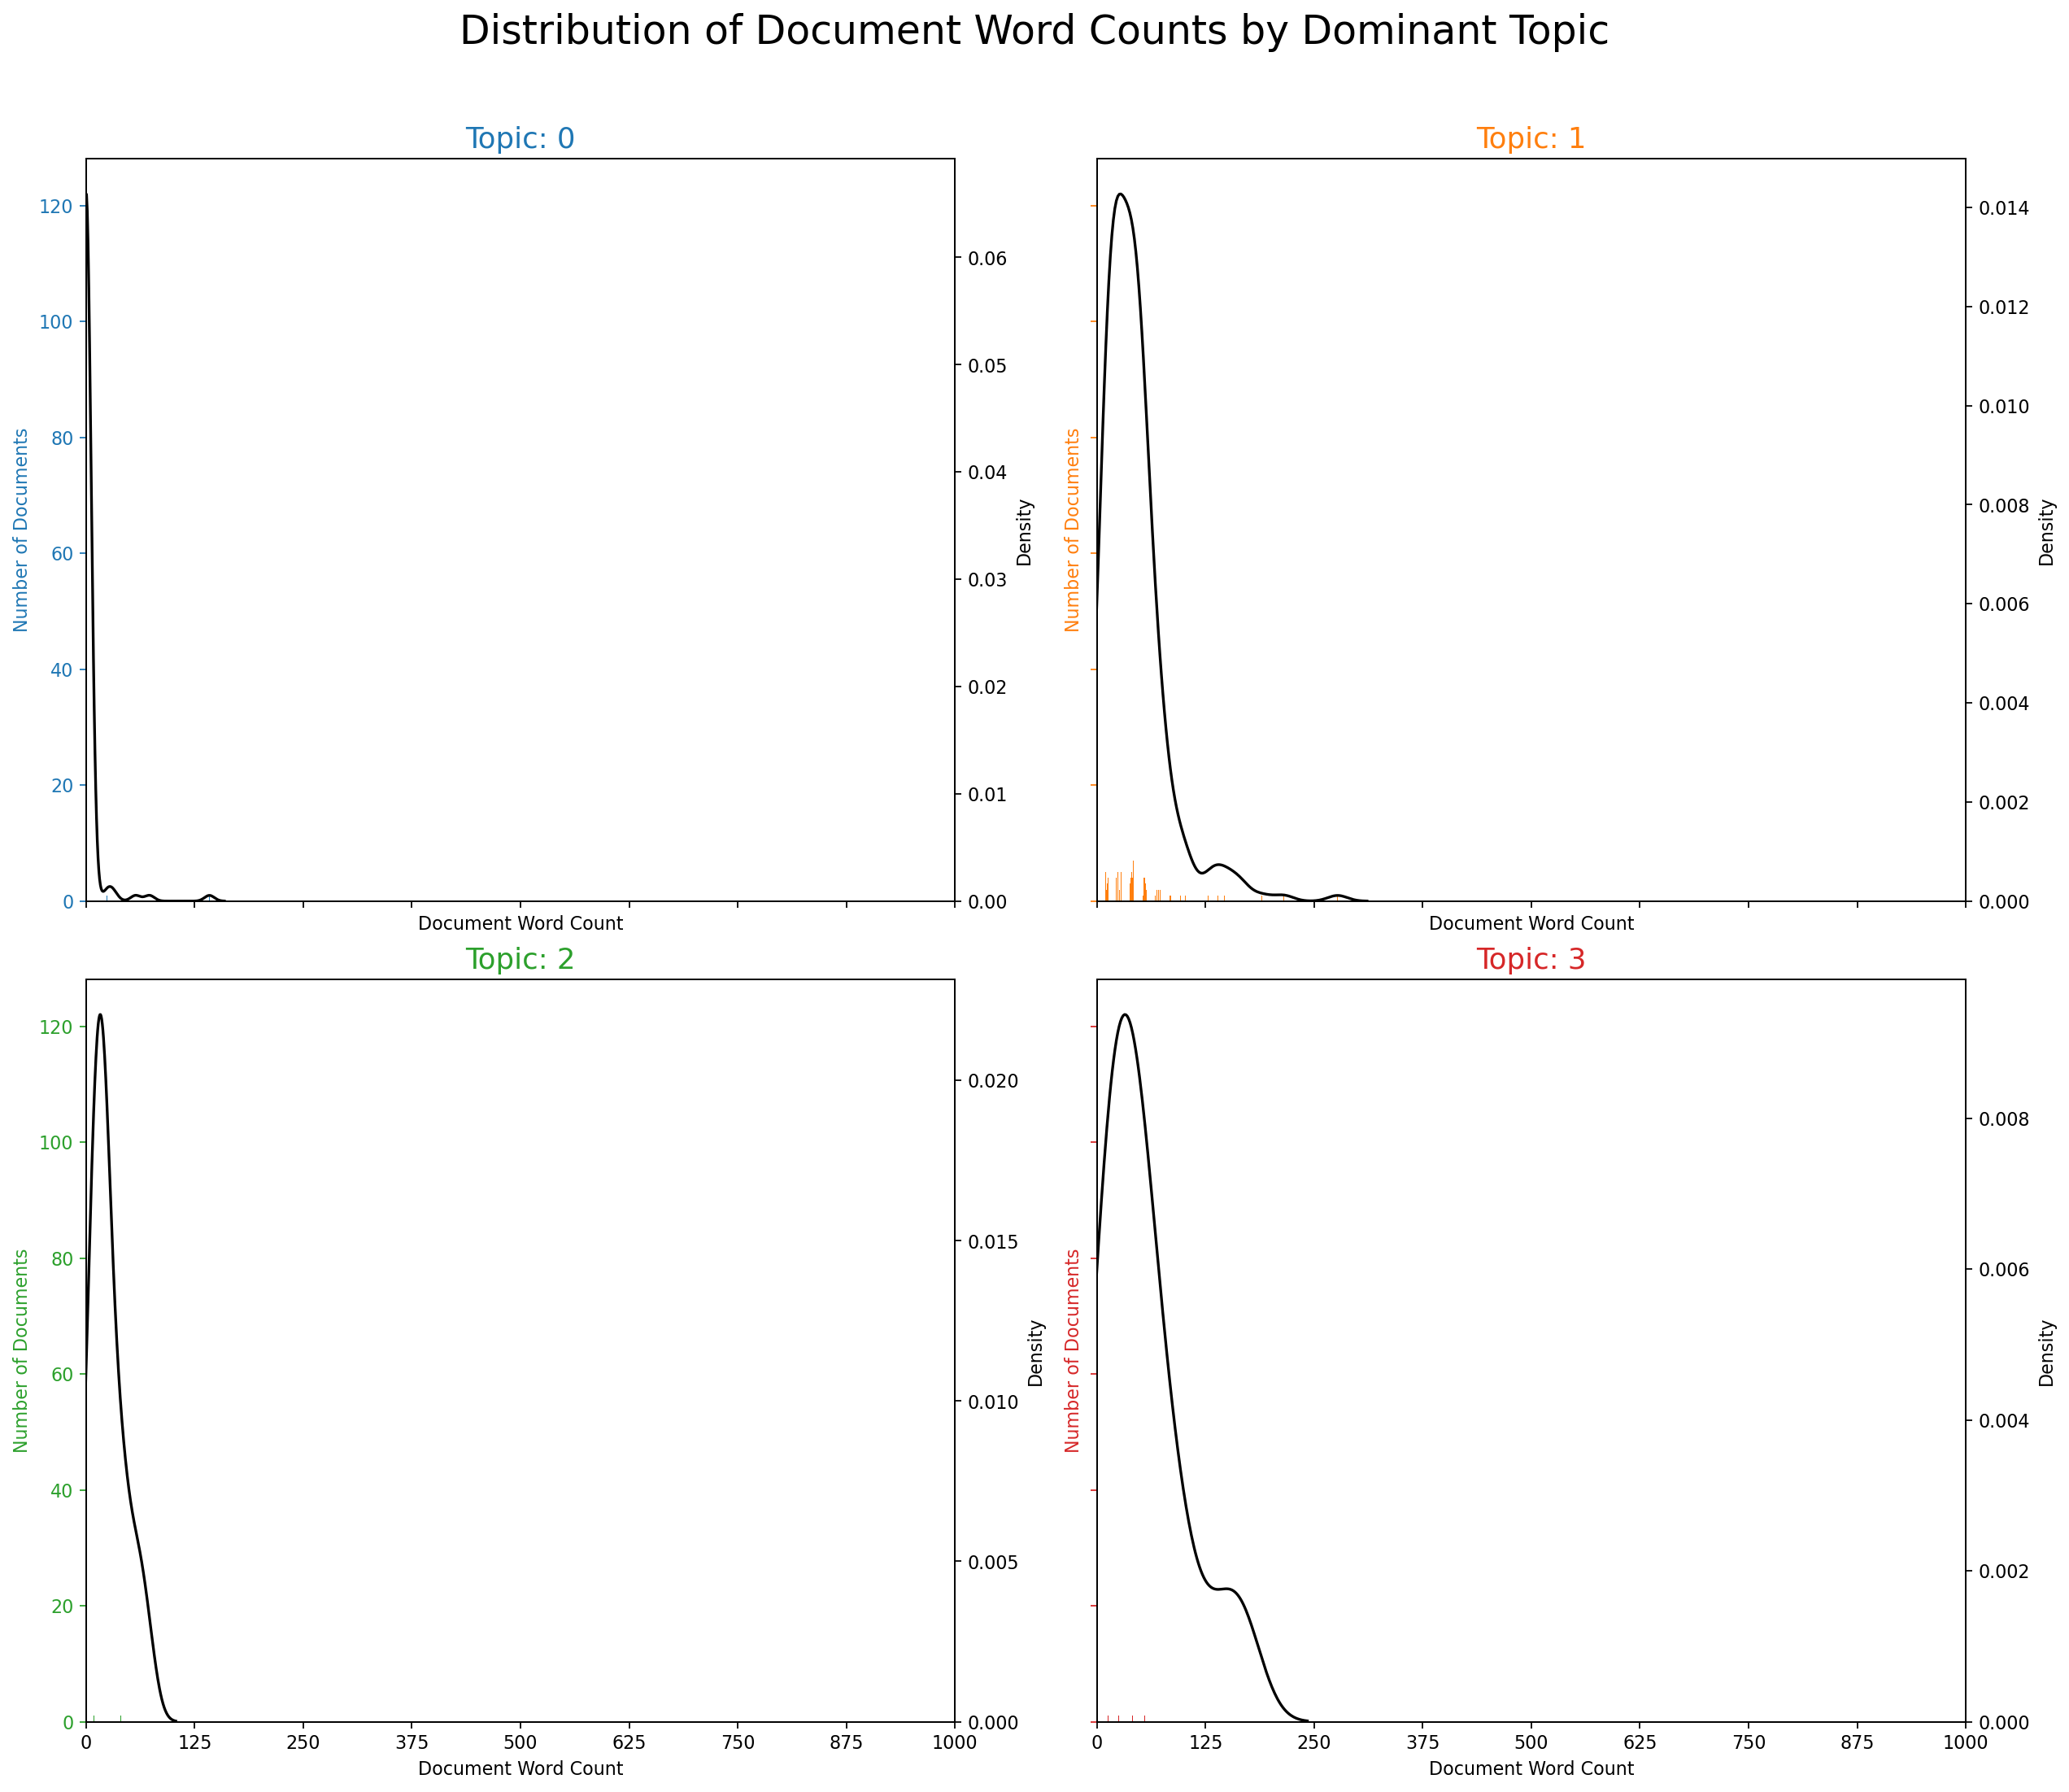

In [60]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [61]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

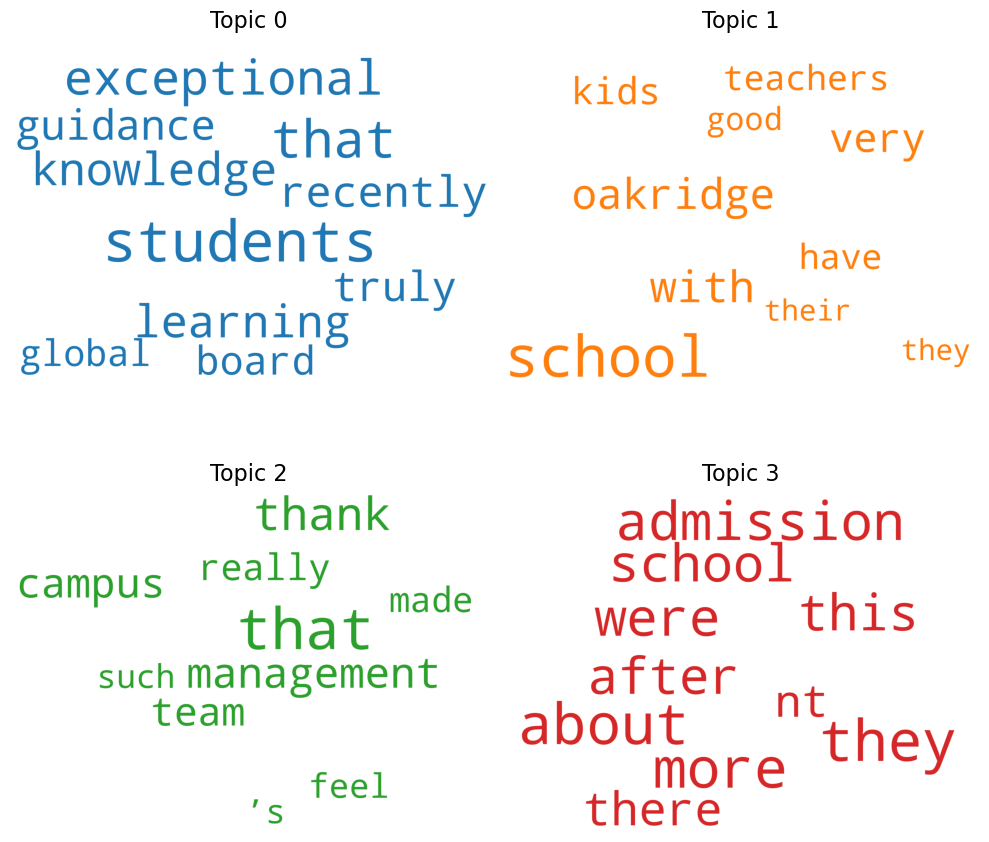

In [62]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\1476584943.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\1476584943.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\1476584943.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\kumar\AppData\Local\Temp\ipykernel_8064\1476584943.py:24: UserWarning: set_ticklabels() should only be used with a fix

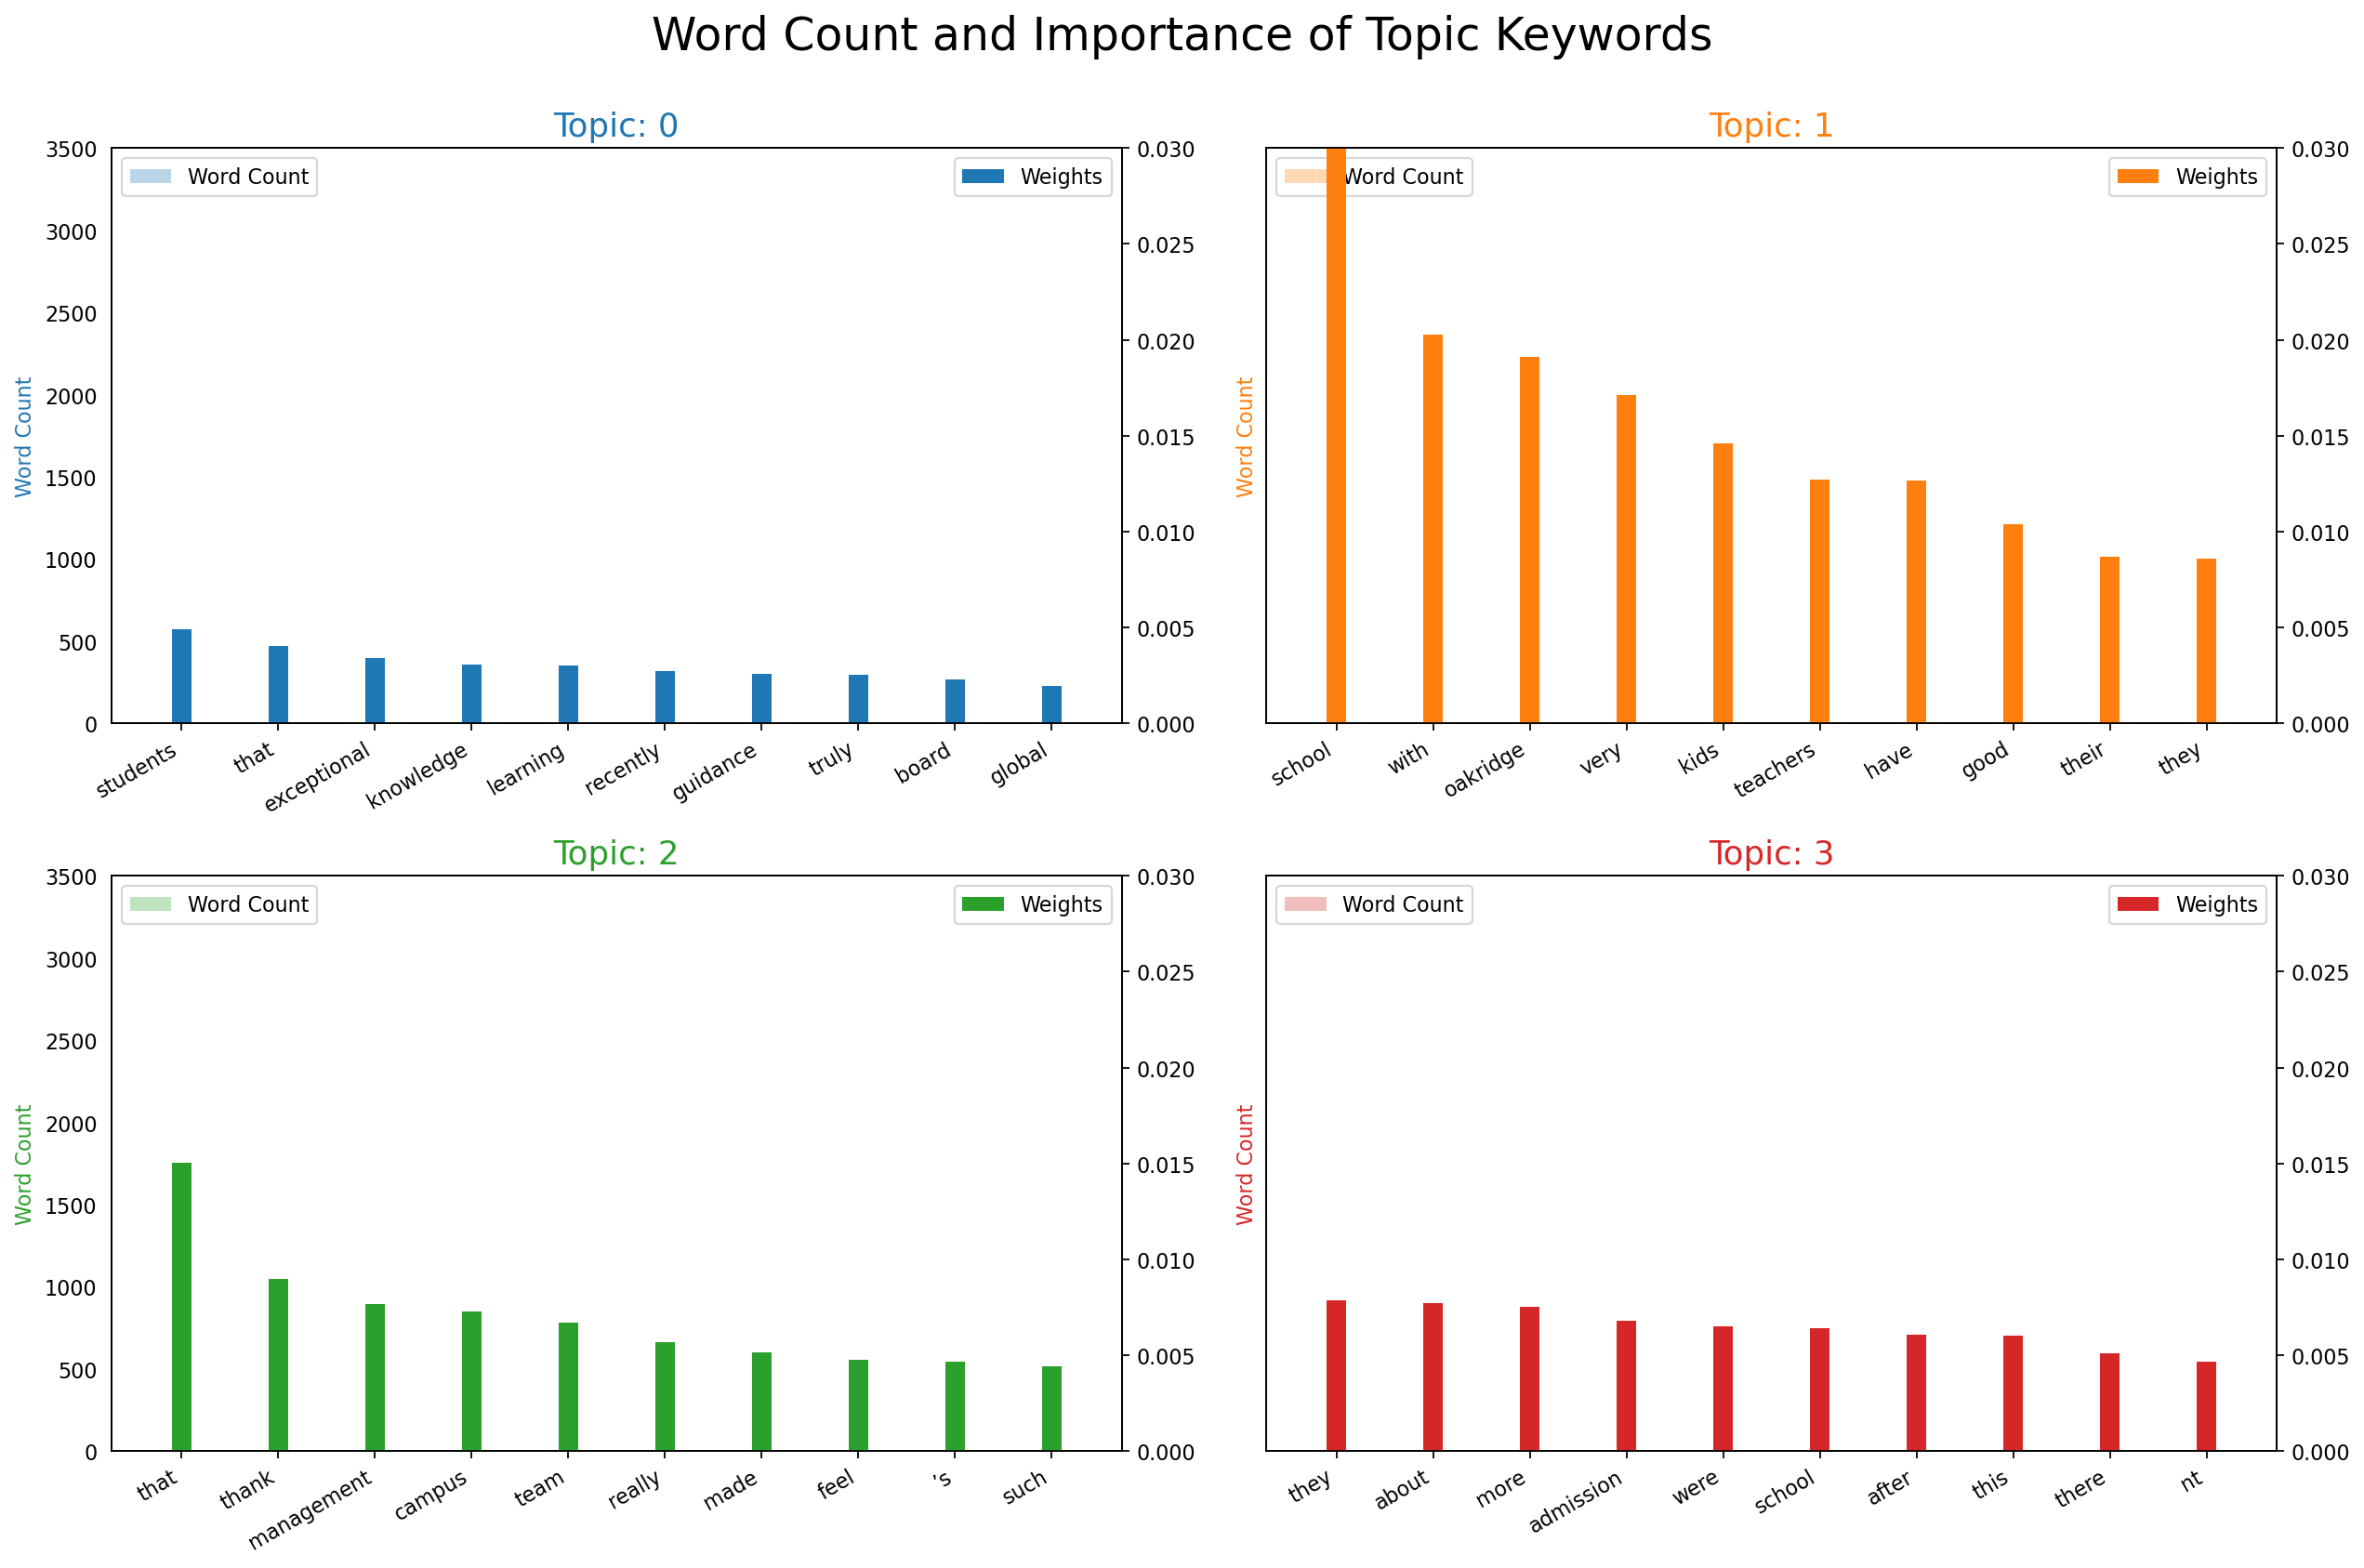

In [63]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

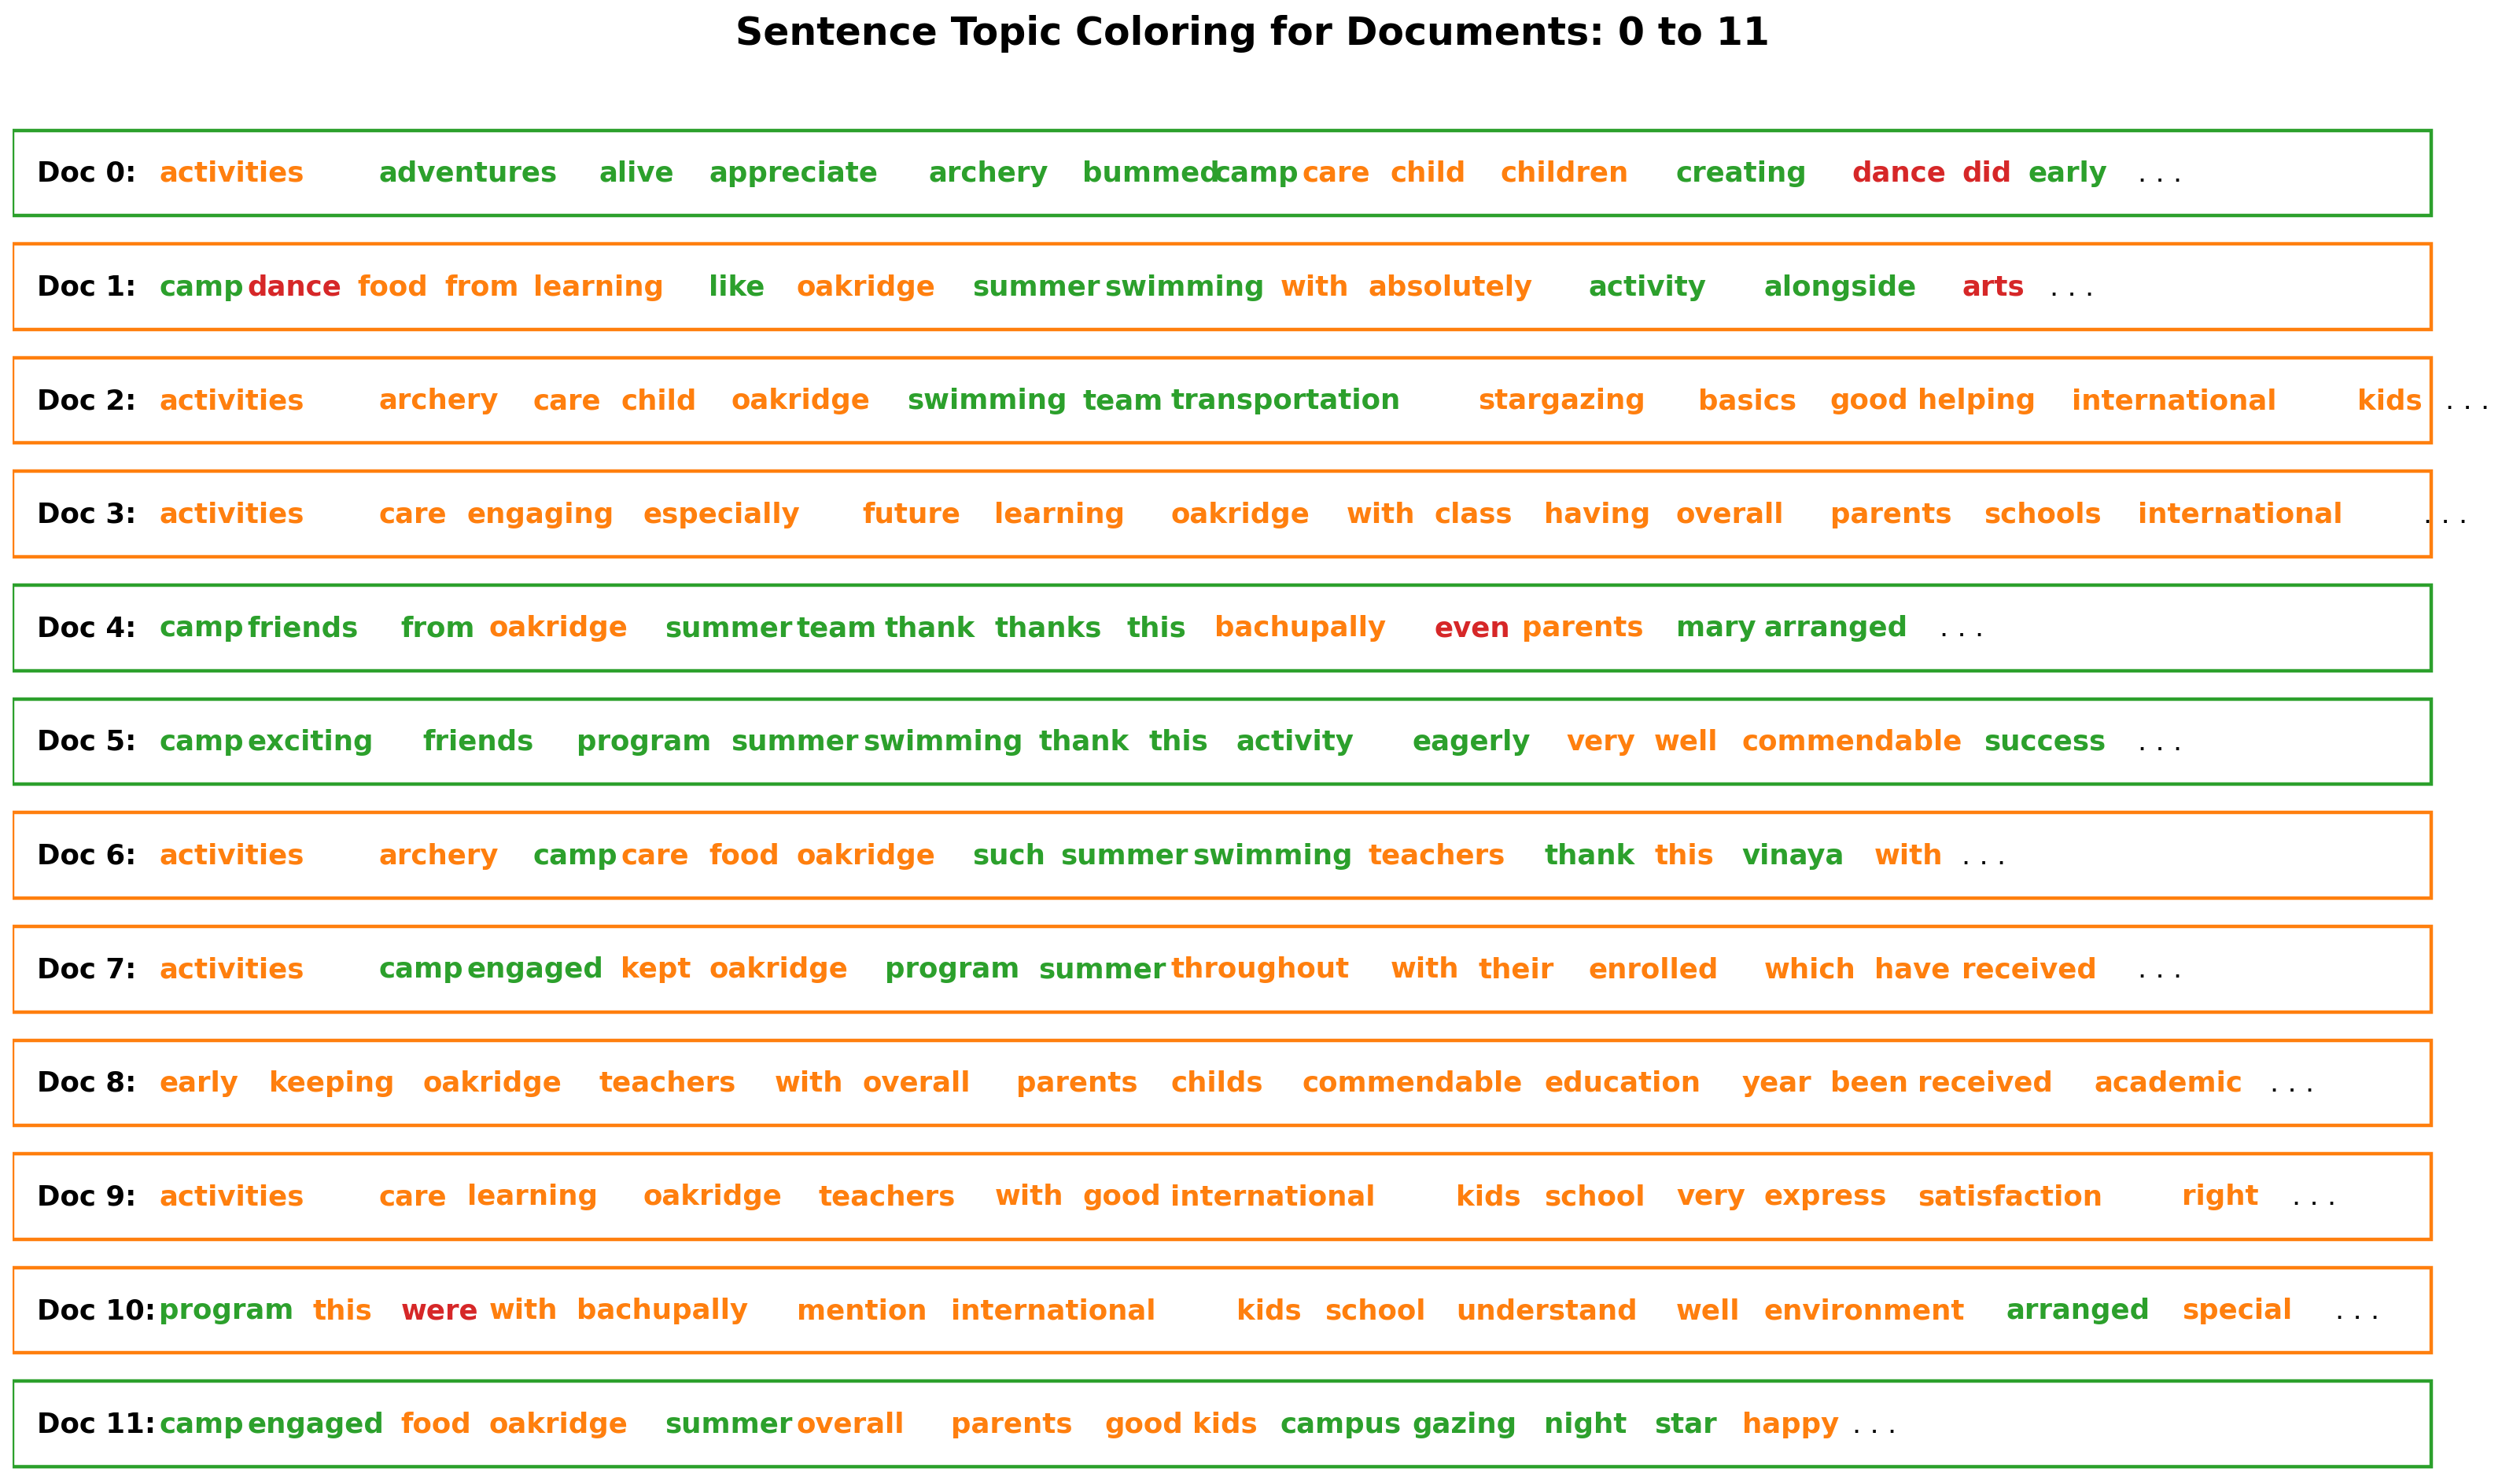

In [64]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [65]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

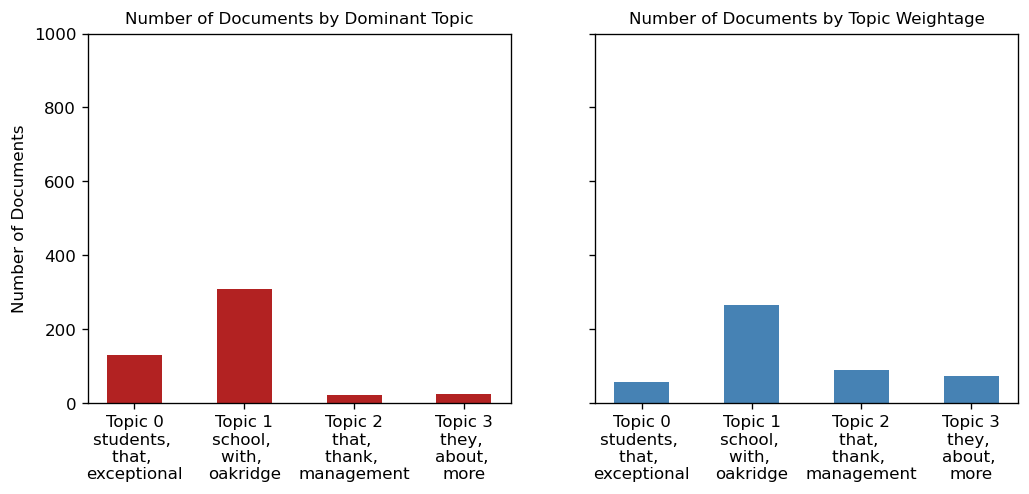

In [66]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [67]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
from bokeh.models import ColumnDataSource

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

source = ColumnDataSource(data=dict(
    x=tsne_lda[:, 0],
    y=tsne_lda[:, 1],
    colors=mycolors[topic_num],
))

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              width=900, height=700)

plot.scatter(x='x', y='y', color='colors', source=source)

show(plot)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 363 samples in 0.016s...
[t-SNE] Computed neighbors for 363 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 363 / 363
[t-SNE] Mean sigma: 0.084499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.543365
[t-SNE] KL divergence after 1000 iterations: 0.316580


Loading BokehJS ...

In [68]:
!pip install --upgrade gensim pyLDAvis


In [69]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.141174  0.002844       1        1  62.078902
2     -0.055287  0.050317       2        1  16.192057
3     -0.044611 -0.055786       3        1  13.375065
0     -0.041276  0.002625       4        1   8.353976, topic_info=         Term        Freq       Total Category  logprob  loglift
108    school  389.000000  389.000000  Default  30.0000  30.0000
64       with  196.000000  196.000000  Default  29.0000  29.0000
209      that   44.000000   44.000000  Default  28.0000  28.0000
40   oakridge  186.000000  186.000000  Default  27.0000  27.0000
115      very  166.000000  166.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
360  students    6.356073   64.917524   Topic4  -5.3192   0.1587
209      that    5.257213   44.858847   Topic4  -5.5090   0.3385
32   learning    3.894012   58.386405   Topic4  -5.8092  -0.2252
581      when    2.191388    8.900857   Topic4  -6.3841   1.0808
352   journey    1.934804    7.610037   Topic4  -6.5086   1.1130

[177 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
395       1  0.537685      about
395       2  0.026884      about
395       3  0.430148      about
1921      1  0.418453  according
1921      2  0.209227  according
...     ...       ...        ...
250       1  0.101966       your
250       2  0.101966       your
250       3  0.815728       your
394       1  0.072185         ’s
394       2  0.866216         ’s

[359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])